In [1]:
#!pip install nibabel


In [2]:

import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import skimage.morphology as mp

In [3]:
path = "Y:/hys/Meta/8921294"
imgname = "2D_T2.nii.gz"
segname = "t2_edema.nii"
totalname = "t2_total.nii"
segname_new = "t2_edema_processed.nii.gz" # 

In [4]:
t2 = nib.load(path+'/'+imgname)
edm = nib.load(path+'/'+segname)
total = nib.load(path+'/'+totalname)

In [5]:
vs = t2.header.get_zooms()
Ne = (np.round(2/vs[0])).astype(int) # 3mm 
Nd = (np.round(10/vs[0])).astype(int) # distance
Nd


21

size of t2 image =  (448, 448, 26)
size of msk image =  (448, 448, 26)
slice # of largest mask: 16


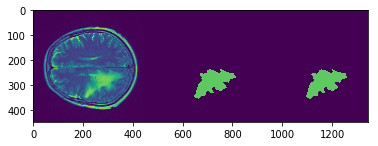

In [8]:

t2img = t2.get_fdata()
print('size of t2 image = ',t2img.shape)
edmimg = edm.get_fdata()
print('size of msk image = ',edmimg.shape)
totalimg = total.get_fdata()

zzz=np.sum(np.sum(edmimg,axis=1),axis=0);
zmax=np.argmax(zzz)
print('slice # of largest mask:',zmax)

n_slice = zmax # slice number to be displayed
plt.imshow(np.concatenate((t2img[:,:,n_slice],1000*edmimg[:,:,n_slice],1000*totalimg[:,:,n_slice]),axis=1))

In [9]:
NX,NY,NZ=edmimg.shape
NZ
edmimg_new=np.zeros(edmimg.shape)
# for 2d erosion/dilation (for conventional 2D MR images)
for nz in range(NZ):
    mass = (totalimg[:,:,nz]-edmimg[:,:,nz])>0.5
    mass = mp.binary_opening(mass,selem=mp.disk(Ne))
    edema = edmimg[:,:,nz]>0.5
    edmimg_new[:,:,nz]=mp.binary_opening(np.multiply(mp.binary_dilation(mass,selem=mp.disk(Nd)),edema),selem=mp.disk(Ne))

In [10]:
edmimg_new = ((edmimg_new.astype(int))>0.5).astype(int)
edm_new=nib.Nifti1Image(edmimg_new,edm.affine,edm.header)
nib.save(edm_new,path+'/'+segname_new)